In this activity you will implement the convolution operation. Your implementation will
detect edges in an image. You are required to implement you own convolution function and 
NOT use existing libraries.

Please use the my-cat.csv as your input. 

Your task is to complete the convolution2D() function in the code below. 

Hint: You will need to multiply each input pixel
    (3x3 neighbor grid) of the input 2D array image2D with the input filter kernel3x3 to obtain 
    the output 2D array convolved2D. 
    
Note: If you use existing libraries such as scipy.signal.convolve2d 
        you will not receive any points for your submission.

Articles: First four paragraphs under the section "2D Convolutions: The Operation"
Lectures: Convolution operation


Ref: https://github.com/badriadhikari/AI/blob/main/Chapter-homeworks.md#chapter-24---implement-convolution-operation

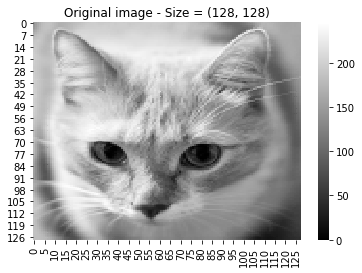

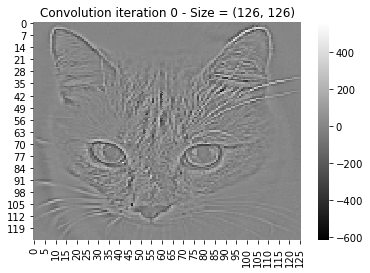

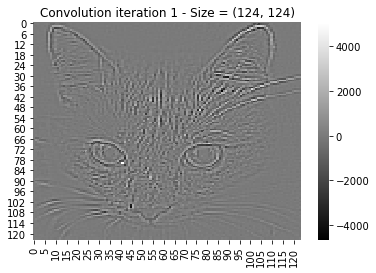

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def convolution2D(image2D, kernel):
    """
        image2D: A 2D array
        kernel: 2D Array
    """
    convolved2D = np.zeros((len(image2D)-2 , len(image2D) - 2))
    
    # dynamically obtain kernel length and breadth
    filter_length, filter_breadth = kernel.shape
    
    
    """
        This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part 
        of the input it is currently on, and then summing up the results into a single output pixel.
    """
    
    for i in range(1, image2D.shape[1]-2):
        for j in range(1, image2D.shape[0]-2):
            
            
            """
            The kernel repeats this process for every location it slides over, converting a 2D matrix of features 
            into yet another 2D matrix of features. The output features are essentially, the weighted sums 
            (with the weights being the values of the kernel itself) of the 
            input features located roughly in the same location of the output pixel on the input layer.
            """
            
            convolved2D[j, i]=(kernel * 
                               image2D[j: j + filter_length, i: i + filter_breadth]
                              ).sum()
    return convolved2D

image2D = np.loadtxt('my-cat.csv', delimiter=',')
sns.heatmap(image2D, cmap='gray')
plt.title('Original image - Size = ' + str(image2D.shape))
plt.show()

edge_detect_filter_3x3 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

for i in range(2):
    convolved_image = convolution2D(image2D, edge_detect_filter_3x3)
    sns.heatmap(convolved_image, cmap='gray')
    plt.title('Convolution iteration ' + str(i) + ' - Size = ' + str(convolved_image.shape))
    plt.show()
    image2D = convolved_image